In [1]:
# Import Matplotlib, pandas, and plotly
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
#Read data from path
df1 = pd.read_csv("data/housing-real-estate-1.csv")
df1.head()

,Unnamed: 0,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85"
1,2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37"
2,3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45"
3,4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20"
4,5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71"


In [3]:
#Remove "NaN" values
df1.dropna(inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               11551 non-null  int64 
 1   property_type            11551 non-null  object
 2   place_with_parent_names  11551 non-null  object
 3   region                   11551 non-null  object
 4   lat-lon                  11551 non-null  object
 5   area_m2                  11551 non-null  int64 
 6   price_usd                11551 non-null  object
dtypes: int64(2), object(5)
memory usage: 721.9+ KB


In [4]:
#Split lat and lon to new col and convert values to float
df1[["lat", "lon"]] = df1["lat-lon"].str.split("," , expand=True).astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               11551 non-null  int64  
 1   property_type            11551 non-null  object 
 2   place_with_parent_names  11551 non-null  object 
 3   region                   11551 non-null  object 
 4   lat-lon                  11551 non-null  object 
 5   area_m2                  11551 non-null  int64  
 6   price_usd                11551 non-null  object 
 7   lat                      11551 non-null  float64
 8   lon                      11551 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 902.4+ KB


In [5]:
df1["state"] = df1["place_with_parent_names"].str.split("|", expand = True)[2]
df1.head()

,Unnamed: 0,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85",-9.644305,-35.708814,Alagoas
1,2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37",-9.643093,-35.704840,Alagoas
2,3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45",-9.622703,-35.729795,Alagoas
3,4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20",-9.622837,-35.719556,Alagoas
4,5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71",-9.654955,-35.700227,Alagoas


In [6]:
df1["price_usd"] = (df1["price_usd"]
                    .str.replace("$" ,"", regex = False)
                    .str.replace("," ,"", regex = False)
                    .astype(float)
                   )
df1.head()

,Unnamed: 0,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,187230.85,-9.644305,-35.708814,Alagoas
1,2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,81133.37,-9.643093,-35.704840,Alagoas
2,3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,154465.45,-9.622703,-35.729795,Alagoas
3,4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,146013.20,-9.622837,-35.719556,Alagoas
4,5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,101416.71,-9.654955,-35.700227,Alagoas


In [7]:
df1.drop(columns=["place_with_parent_names", "lat-lon"], inplace=True)

In [8]:
#Import the CSV file brasil-real-estate-2.csv into the DataFrame df2.

df2 = pd.read_csv("data/brasil-real-estate-2.csv", encoding = "ISO-8859-1")
df2.head() 

,Unnamed: 0,property_type,state,region,lat,lon,area_m2,price_brl
0,1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [9]:
#Use the "price_brl" column to create a new column named "price_usd". (Keep in mind that, when this data was collected in 2015 and 2016, a US dollar cost 3.19 Brazilian reals.)
df2["price_usd"] = (df2["price_brl"] / 3.19).round(2)

df2.head()

,Unnamed: 0,property_type,state,region,lat,lon,area_m2,price_brl,price_usd
0,1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98,129850.46
1,2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53,265958.79
2,3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28,93867.80
3,4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53,265958.79
4,5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36,145495.10


In [10]:
#Drop the "price_brl" column from df2, as well as any rows that have NaN values.
df2.dropna(inplace=True)
df2.drop(columns = ["price_brl"], inplace=True)
df2.head()

,Unnamed: 0,property_type,state,region,lat,lon,area_m2,price_usd
0,1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.46
1,2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.79
2,3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.80
3,4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.79
4,5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.10


In [11]:
#Concatenate df1 and df2 to create a new DataFrame named df.
df = pd.concat([df1, df2])

In [12]:
#scatter_mapbox showing the location of the properties in df
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [13]:
# summary statistics for the "area_m2" and "price_usd"
summary_stats = df[["area_m2","price_usd"]].describe()
summary_stats

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,194987.315515
std,47.742932,103617.682979
min,53.000000,74892.340000
25%,76.000000,113898.770000
50%,103.000000,165697.555000
75%,142.000000,246900.882500
max,252.000000,525659.720000


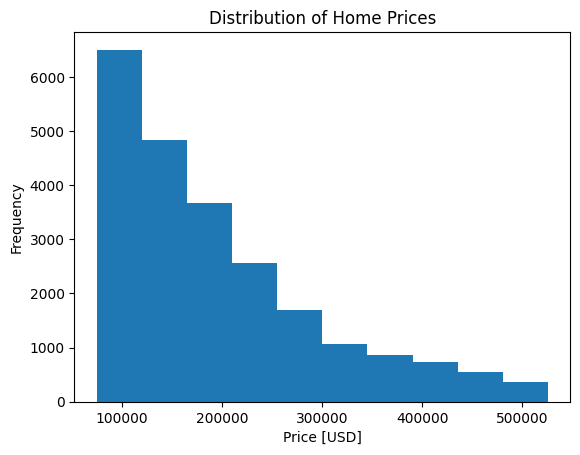

In [14]:
# histogram of "price_usd"
plt.hist(x=df["price_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices");
plt.savefig("images/1-5-12.png", dpi=150)


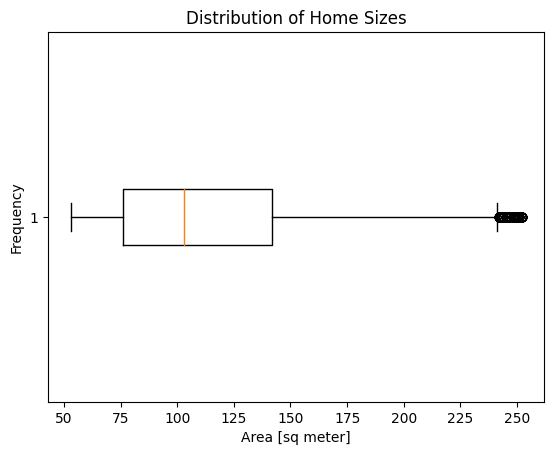

In [15]:
#horizontal boxplot of "area_m2"
plt.boxplot(df["area_m2"] , vert=False)
plt.xlabel("Area [sq meter]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes");
plt.savefig("images/1-5-13.png", dpi=150)

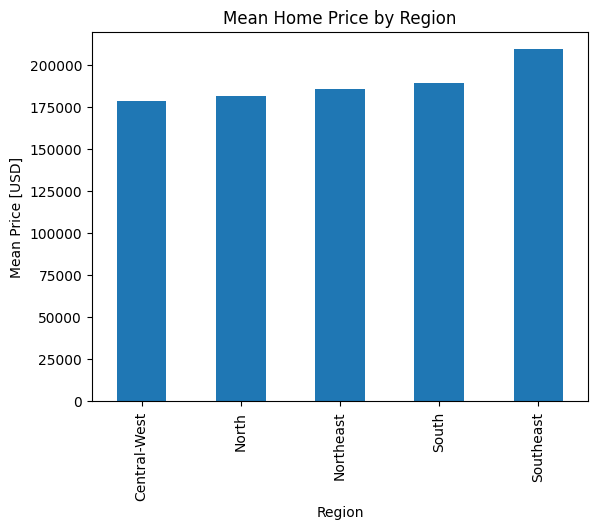

In [16]:
# mean home price in each region in Brazil
mean_price_by_region = df.groupby("region")["price_usd"].mean().sort_values()
mean_price_by_region
mean_price_by_region.plot(
    kind="bar",
    xlabel= "Region",
    ylabel= "Mean Price [USD]",
    title= "Mean Home Price by Region"
);
plt.savefig("images/1-5-15.png", dpi=150)



In [22]:
#DataFrame df_south that contains all the homes from df that are in the "South" region.
df_south = df[df["region"] == "South"]
homes_by_state = df_south["state"].value_counts().head()
homes_by_state.head()

state
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: count, dtype: int64

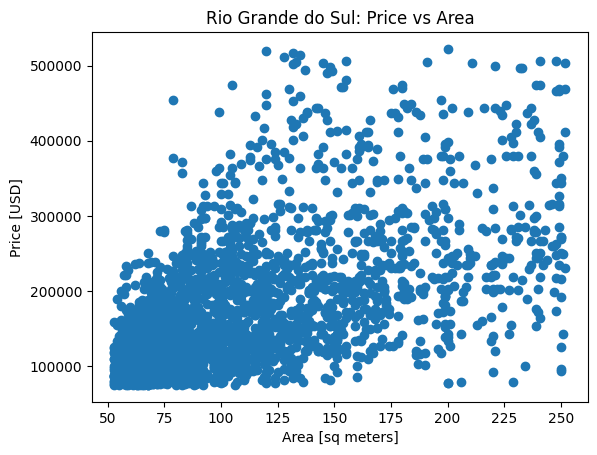

In [18]:
#scatter plot showing price vs. area for the state in df_south that has the largest number of properties
df_rio = df[df["state"] == "Rio Grande do Sul"]
plt.scatter(x = df_rio["area_m2"], y = df_rio["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Rio Grande do Sul: Price vs Area");
plt.savefig("images/1-5-18.png", dpi=150)


In [23]:
df_south.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7821 entries, 9304 to 9747
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7821 non-null   int64  
 1   property_type  7821 non-null   object 
 2   region         7821 non-null   object 
 3   area_m2        7821 non-null   float64
 4   price_usd      7821 non-null   float64
 5   lat            7821 non-null   float64
 6   lon            7821 non-null   float64
 7   state          7821 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 549.9+ KB


In [20]:
south_states_corr = {}

for df_south in df_south:
    south_states_corr = df_south["area_m2"].corr(df_south["price_usd"])
    south_states_corr["state"] = south_states_corr 
print(south_states_corr)


TypeError: string indices must be integers